In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Явная схема

* Посмотрим на графики

In [2]:
class thermalConductivityExplicit():
    def __init__(self):
        """
        Инициализация параметров
        """
        self.L = 1
        self.lam = 46
        self.ro = 7800
        self.C = 460
        self.T0 = 300
        self.Tl = 600
        self.Tr = 400

        self.delta = 100

        self.timeOfExperience = 60
        self.tau = self.timeOfExperience / 10000
        self.h = 0.001

        self.T = [self.T0 for i in range(self.delta)]
        self.Tn = [self.T0 for i in range(self.delta)]

        self.T[0] = self.Tl
        self.T[-1] = self.Tr

        self.Tn[0] = self.Tl
        self.Tn[-1] = self.Tr

        self.coeff = self.lam * self.tau / self.ro / self.C / (self.h**2)

    def updTemperatureDot(self, i):
        """
        Обновление точки температуры
        """
        self.T[i] = self.Tn[i] + self.coeff * (self.Tn[i + 1] -
                                               2 * self.Tn[i] + self.Tn[i - 1])

    def updTemperatureList(self):
        """
        Обновление массива температур
        """
        for i in range(1, len(self.T) - 1, 1):
            self.updTemperatureDot(i)
        self.Tn = self.T.copy()

    def experiment(self):
        """
        Проведение эксперимента
        """
        t = 0
        while t <= self.timeOfExperience:
            self.updTemperatureList()
            t += self.tau

    def get_T(self):
        """
        Возвращает температуру
        """
        return self.T

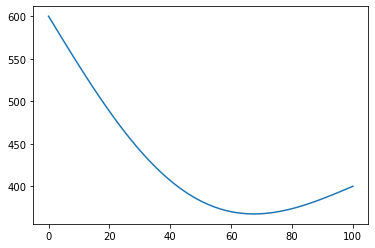

In [3]:
exp_1 = thermalConductivityExplicit()
exp_1.experiment()
x = np.linspace(0, 100, 100)
y = exp_1.get_T()
plt.plot(x, y)

# Неявная схема

In [4]:
class thermalConductivityImplicit():
    def __init__(self):
        """
        Инициализация параметров
        """
        self.L = 0.1
        self.lam = 46
        self.ro = 7800
        self.C = 460
        self.T0 = 300
        self.Tl = 600
        self.Tr = 400

        self.delta = 100

        self.timeOfExperience = 60
        self.tau = self.timeOfExperience / self.delta
        self.h = self.L / self.delta

        self.T = [self.T0 for i in range(self.delta)]
        self.T[0] = self.Tl
        self.T[-1] = self.Tr

        self.alpha = [0 for i in range(self.delta)]
        self.betta = [self.T[0] for i in range(self.delta)]

    def updParameters(self, i):
        """
        Обновление параметров альфа и бетта
        """
        Ai = Ci = self.lam / self.h**2
        Bi = 2 * Ai + self.C * self.ro / self.tau

        Fi = -self.ro * self.C / self.tau * self.T[i]

        self.alpha[i] = Ai / (Bi - self.alpha[i - 1] * Ci)
        self.betta[i] = (Ci * self.betta[i - 1] -
                         Fi) / (Bi - self.alpha[i - 1] * Ci)

    def updTemperatureDot(self, i):
        """
        Обновление точки температуры
        """
        self.T[i] = self.alpha[i] * self.T[i + 1] + self.betta[i]

    def updTemperatureList(self):
        """
        Обновление массива температур
        """
        self.alpha = [0 for i in range(self.delta)]
        self.betta = [self.T[0] for i in range(self.delta)]

        for i in range(1, len(self.T) - 1, 1):
            self.updParameters(i)

        for i in range(len(self.T) - 2, 0, -1):
            self.updTemperatureDot(i)

    def experiment(self):
        t = 0
        while t <= self.timeOfExperience:
            self.updTemperatureList()
            t += self.tau

    def get_T(self):
        return self.T

* Посмотрим на графики

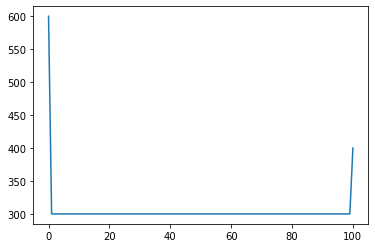

In [5]:
exp_2 = thermalConductivityImplicit()
x = np.linspace(0, 100, 100)
y = exp_2.get_T()
plt.plot(x, y)

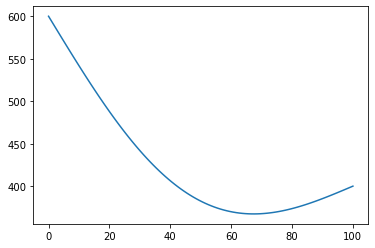

In [6]:
exp_2.experiment()
x = np.linspace(0, 100, 100)
y = exp_2.get_T()
plt.plot(x, y)